# Major Project


### Problem Statement: You will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India

Tasks:

1.Clean Data(Null value removal, Outlier identification)

2.Null Values(Dropping the rows /Columns and what is the reason or how you are imputing the null).

3.EDA(Minor Project to understand the relations, repeat the same here)

4.Handle Categorical Variable(Using Label Encoding/One hot encoding)

5.Try to do data scaling for Kilometers driven

6.Do the train test  split

7.Apply different ML regression Algorithms

8.Calculate the error metrics.

In [106]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsa
sns.set()

In [2]:
td = pd.read_csv("C:\\Users\\tanis\\Downloads\\Data_Train.csv")   #Load the data csv file into memory
td

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [3]:
td.shape #we have  6019 rows in our dataset and  12 columns

(6019, 12)

In [4]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [5]:
td.columns.tolist()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

In [6]:
td.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
td['Kilometers_Driven'].value_counts()

60000    82
45000    70
65000    68
50000    61
70000    60
         ..
50446     1
54540     1
70920     1
75014     1
83969     1
Name: Kilometers_Driven, Length: 3093, dtype: int64

In [8]:
# Looking ate the unique values of Categorical Features
print(td['Location'].unique())
print(td['Fuel_Type'].unique())
print(td['Transmission'].unique())
print(td['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


## Cleaning null values

In [9]:
td.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [10]:
print("Shape of train data Before dropping any Row: ",td.shape)
td =td[td['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",td.shape)
td = td[td['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",td.shape)
td = td[td['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",td.shape)
td = td[td['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",td.shape)

Shape of train data Before dropping any Row:  (6019, 12)
Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 12)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 12)
Shape of train data After dropping Rows with NULL values in Power  :  (5981, 12)
Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 12)


In [103]:
td.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Mileage(km/kg)       0
Engine(CC)           0
Power(bhp)           0
Company              0
dtype: int64

Complete removal of data with missing values results in robust and highly accurate model.As there are not much null values so it must not harm our model


So, in total I have 6019 Rows now to work forward. I droped 44 rows.

In [100]:
td = td.reset_index(drop=True)  #reset the index and droping the present index.

### Converting name into Company(brand name) and semi numeric data column into purely numeric

In [104]:
for i in range(td.shape[0]):
    td.at[i, 'Company'] = td['Name'][i].split()[0]
    td.at[i, 'Mileage(km/kg)'] = td['Mileage'][i].split()[0]
    td.at[i, 'Engine(CC)'] = td['Engine'][i].split()[0]
    td.at[i, 'Power(bhp)'] = td['Power'][i].split()[0]


In [102]:
td['Mileage(km/kg)'] = td['Mileage(km/kg)'].astype(float)
td['Engine(CC)'] = td['Engine(CC)'].astype(float)

In [14]:
td['Power'][76]


'null bhp'

In [77]:
x = 'n'
count = 0
position = []
for i in range(td.shape[0]):
    if td['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
103
[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [ ]:
td = td.drop(td.index[position])
td = td.reset_index(drop=True)

In [ ]:
td.shape

In [ ]:
td['Power(bhp)'] = td['Power(bhp)'].astype(float)

In [ ]:
td.head()

Now,

Let's delete all useless Columns.

In [ ]:
td.drop(["Name"],axis=1,inplace=True)
td.drop(["Mileage"],axis=1,inplace=True)
td.drop(["Engine"],axis=1,inplace=True)
td.drop(["Power"],axis=1,inplace=True)

In [16]:
td.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,19.67,1582.0,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,18.20,1199.0,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,15.20,1968.0,140.8


## Data Visualization

In [17]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Company            5975 non-null   object 
 13  Mileage(km/kg)     5975 non-null   float64
 14  Engine(CC)         5975 non-null   float64
 15  Power(bhp)         5975 non-null   object 
dtypes: float64(4), int64(2),

In [18]:
td['Price'].describe()

count    5975.000000
mean        9.501647
std        11.205736
min         0.440000
25%         3.500000
50%         5.650000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

###  Comparing Price  with Location,Company,Fuel type,year,Transmission ,Seats and Owner type

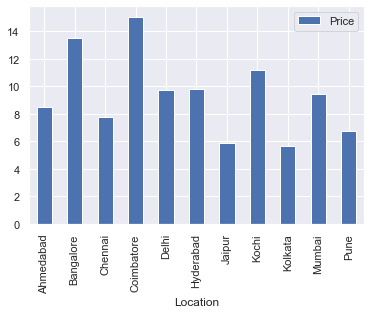

In [19]:
x = pd.DataFrame(td.groupby('Location')['Price'].mean())
x.plot.bar()
plt.show() 

Price of car are high in Coimbatore and Bangalore.

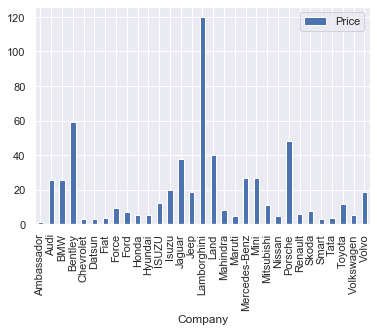

In [20]:
x = pd.DataFrame(td.groupby('Company')['Price'].mean())
x.plot.bar()
plt.show() 

Price of lamborgini brand car is high and Bently is second

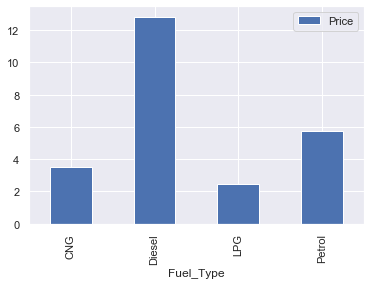

In [21]:
x = pd.DataFrame(td.groupby('Fuel_Type')['Price'].mean())
x.plot.bar()
plt.show()

Disel price car is more.

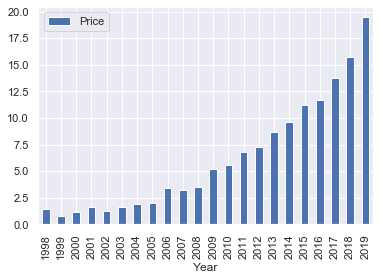

In [22]:
x = pd.DataFrame(td.groupby('Year')['Price'].mean())
x.plot.bar()
plt.show()

Car of year 2019 is highest.

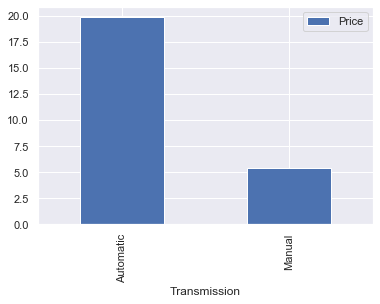

In [23]:
x = pd.DataFrame(td.groupby('Transmission')['Price'].mean())
x.plot.bar()
plt.show()

Price of automatic car is highest.

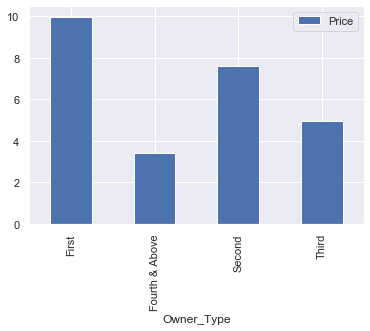

In [24]:
x = pd.DataFrame(td.groupby('Owner_Type')['Price'].mean())
x.plot.bar()
plt.show()

Price of first handed cars is more.

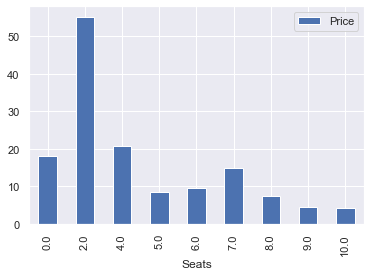

In [25]:
x = pd.DataFrame(td.groupby('Seats')['Price'].mean())
x.plot.bar()
plt.show()

Price of two seated car is more.

### Fuel Type

In [26]:
td['Fuel_Type'].describe()

count       5975
unique         4
top       Diesel
freq        3195
Name: Fuel_Type, dtype: object

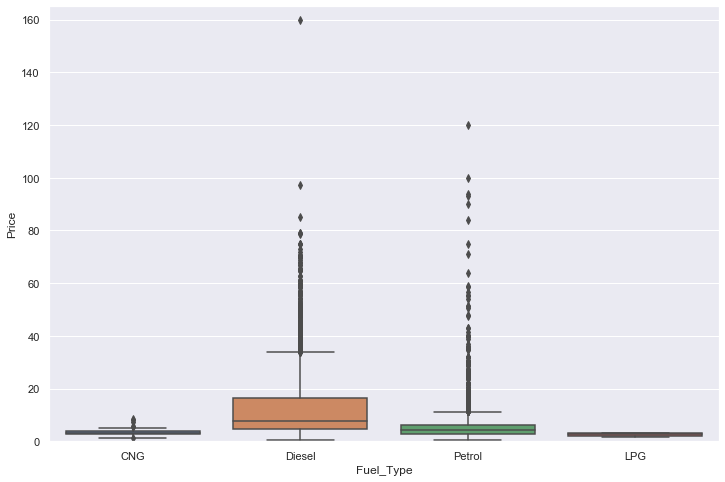

In [27]:
var = 'Fuel_Type'
data = pd.concat([td['Price'], td[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=td)
fig.axis(ymin=0, ymax=165);


As, we thought diseal car would cost followed Petrol.

### Year

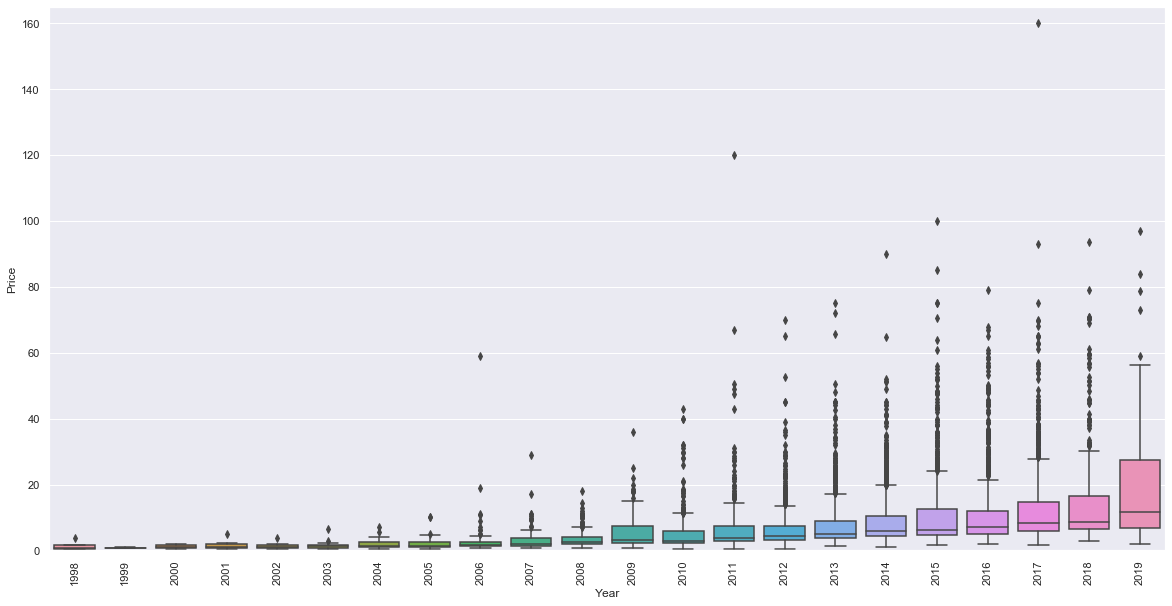

In [28]:
var = 'Year'
data = pd.concat([td['Price'], td[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price",data= td)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);


Price of Newest is high compared to old models.m

### Owner type

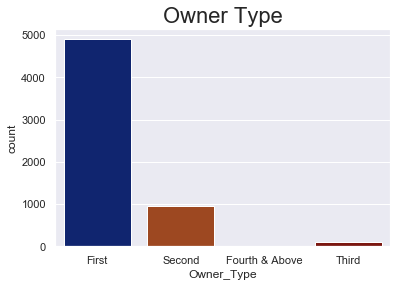

In [29]:
plt.title('Owner Type',fontsize='22')
sns.countplot(x='Owner_Type', data=td,palette='dark')  # first hand cars are mamimum
plt.show()

### Location

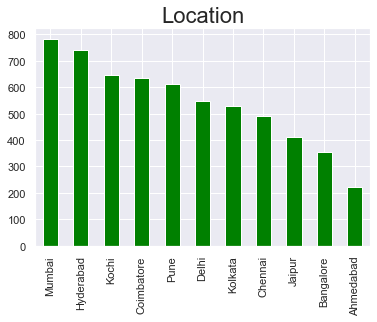

In [30]:
plt.title('Location',fontsize='22')
td['Location'].value_counts().plot(kind='bar',color='green') # most of the cars are from Mumbai
plt.show()

More number of cars are sold in Mumbai and hyderabad.

## Categorical Variable(Using Label Encoding/One hot encoding)

For hadeling categorical data. We modtly use these 2 path:

* OneHotEncoder
* LabelEncoder

Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order.

In [31]:
var = 'Location'
td[var].value_counts()  #Working for Location

Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

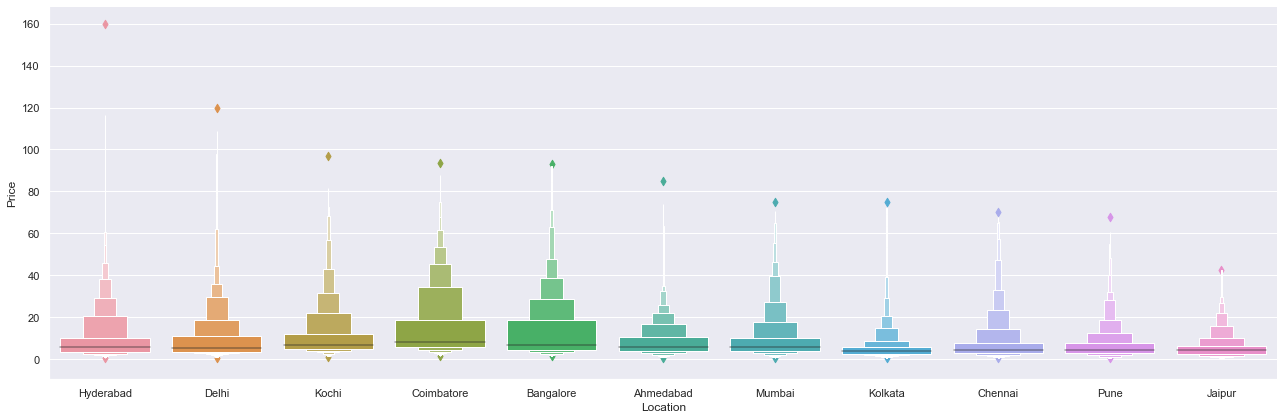

In [32]:
# Plot Location vs Price
sns.catplot(y='Price',x=var,data= td.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [33]:
Location = td[[var]]
Location = pd.get_dummies(Location,drop_first=True) #We will be using One-hot-encoding here
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [34]:
var = 'Fuel_Type'
td[var].value_counts()

Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

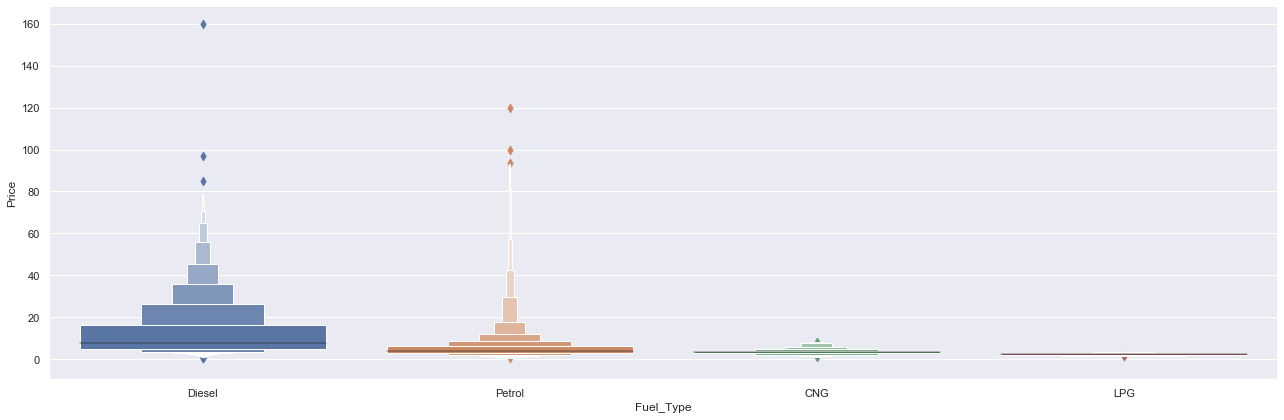

In [35]:
sns.catplot(y='Price',x=var,data= td.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [36]:
Fuel_t = td[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)  #we will be using One-hot-encoding
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [37]:
var = 'Transmission'
td[var].value_counts() # working for transmission

Manual       4266
Automatic    1709
Name: Transmission, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

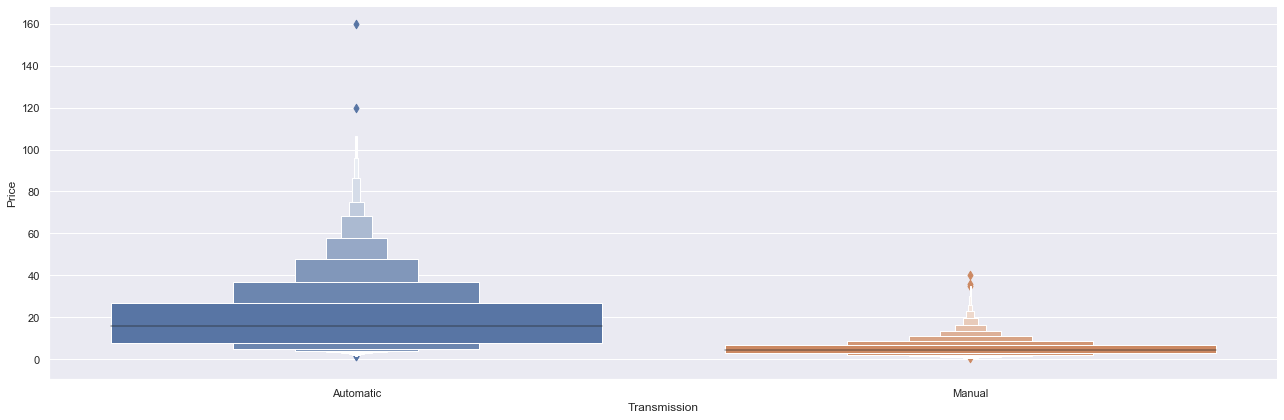

In [38]:
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= td.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [39]:
Transmission = td[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()


,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [40]:
var = 'Owner_Type'
td[var].value_counts() #working with owner type

First             4903
Second             953
Third              111
Fourth & Above       8
Name: Owner_Type, dtype: int64

In [41]:
td.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
td.head() ##As Owner_Type column has ordered data so we will be using Label Encoding Finally

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,19.67,1582.0,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,18.20,1199.0,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,15.20,1968.0,140.8


In [42]:
var = 'Company'     ## working with company
td[var].value_counts()

Maruti           1197
Hyundai          1100
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Bentley             1
Isuzu               1
Smart               1
Lamborghini         1
Name: Company, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

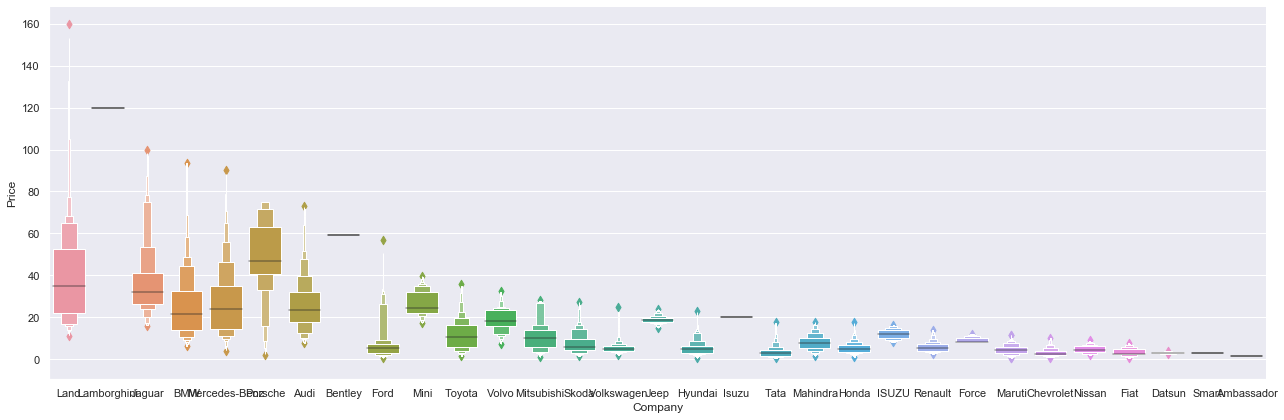

In [43]:

sns.catplot(y='Price',x=var,data= td.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

A lot of variation so let's drop them

In [44]:
td.drop(["Company"],axis=1,inplace=True)

In [45]:
final_train= pd.concat([td,Location,Fuel_t,Transmission],axis=1)
final_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.6 km/kg,998 CC,58.16 bhp,...,0,0,0,0,1,0,0,0,0,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67 kmpl,1582 CC,126.2 bhp,...,0,0,0,0,0,1,1,0,0,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.2 kmpl,1199 CC,88.7 bhp,...,0,0,0,0,0,0,0,0,1,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77 kmpl,1248 CC,88.76 bhp,...,0,0,0,0,0,0,1,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.2 kmpl,1968 CC,140.8 bhp,...,0,0,0,0,0,0,1,0,0,0


In [46]:
final_train.drop(["Location","Fuel_Type","Transmission"],axis=1,inplace=True)
final_train.head()


,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage(km/kg),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Maruti Wagon R LXI CNG,2010,72000,1,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,26.60,...,0,0,0,0,1,0,0,0,0,1
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,19.67,...,0,0,0,0,0,1,1,0,0,1
2,Honda Jazz V,2011,46000,1,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,18.20,...,0,0,0,0,0,0,0,0,1,1
3,Maruti Ertiga VDI,2012,87000,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,20.77,...,0,0,0,0,0,0,1,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,15.20,...,0,0,0,0,0,0,1,0,0,0


In [47]:
final_train.shape

(5975, 26)

## Outliers Identification

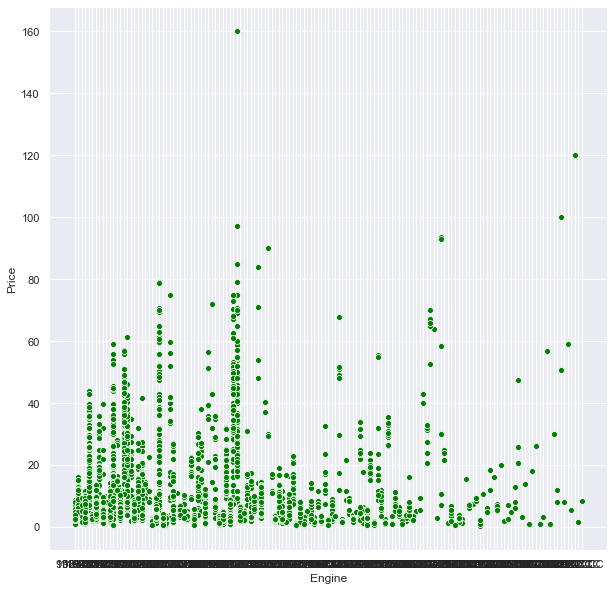

In [132]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Engine", y="Price", data=final_train,color='green')
plt.show() # no outliers

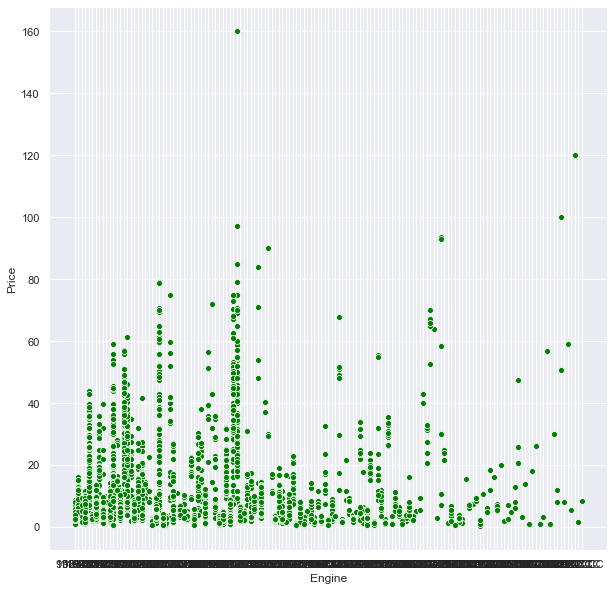

In [133]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Engine", y="Price", data=final_train,color='green')
plt.show() # no outliers

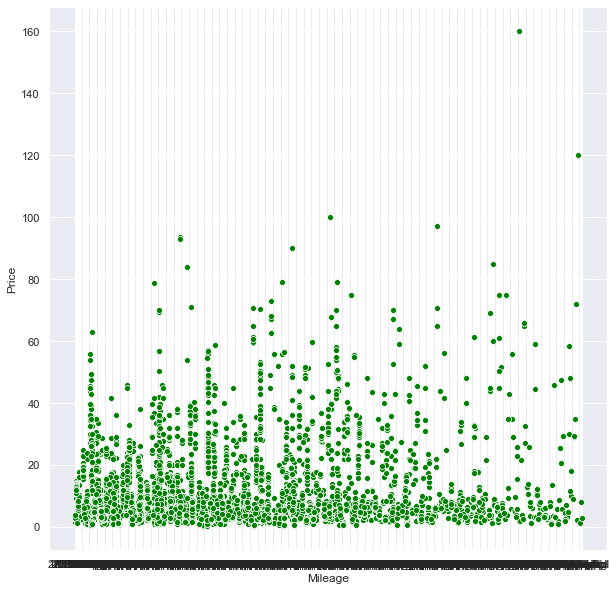

In [123]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Mileage", y="Price", data=td,color='green')
plt.show() # no outliers

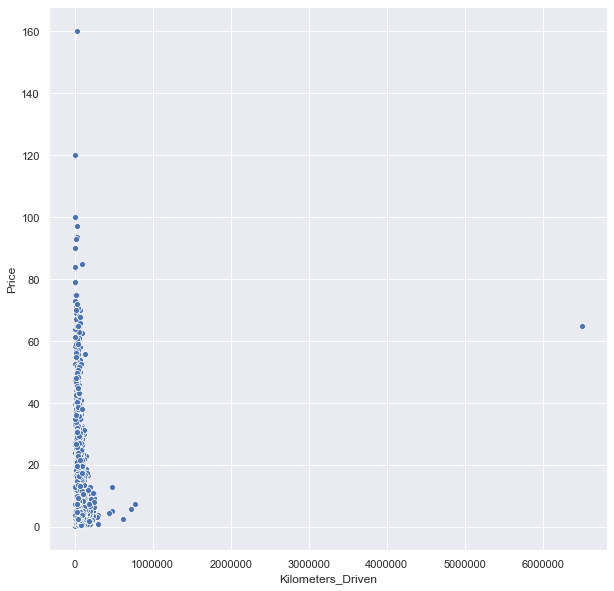

In [134]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Kilometers_Driven", y="Price", data=final_train)
plt.show()
# Here there is an outlier present (a point in kilometer_driven is outlier)

In [135]:
td.drop(final_train[final_train['Kilometers_Driven'] >= 6000000].index, axis=0, inplace=True) # outlier is removed
td.shape

(5947, 16)

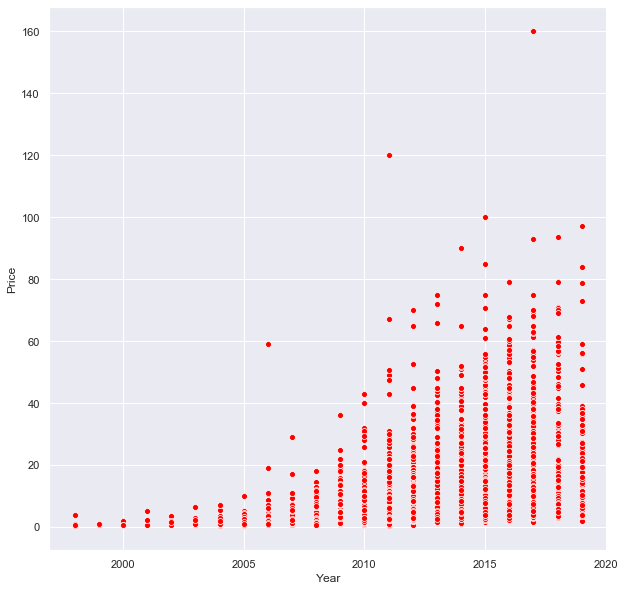

In [136]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Year", y="Price", data=final_train,color='red')
plt.show()
# cars of before year 2000 are outlier

In [137]:
final_train.drop(td[td['Year'] <= 2000].index, axis=0, inplace=True) # outlier is removed
final_train.shape

(5975, 26)

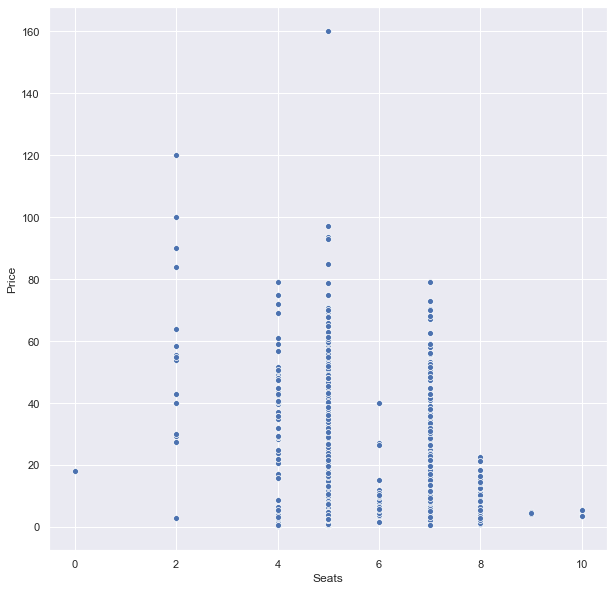

In [138]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Seats", y="Price", data=final_train)
plt.show() # cars with <2 seats are outliers

In [139]:
final_train.drop(td[td['Seats'] <= 2].index, axis=0, inplace=True) # outlier is removed
final_train.shape

(5975, 26)

In [141]:
final_train=final_train.reset_index(drop=True)

In [140]:
final_train.tail()

,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage(km/kg),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
5970,Maruti Swift VDI,2014,27365,1,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,28.40,...,0,0,0,0,0,0,1,0,0,1
5971,Hyundai Xcent 1.1 CRDi S,2015,100000,1,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,24.40,...,0,1,0,0,0,0,1,0,0,1
5972,Mahindra Xylo D4 BSIV,2012,55000,2,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,14.00,...,0,1,0,0,0,0,1,0,0,1
5973,Maruti Wagon R VXI,2013,46000,1,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,18.90,...,0,0,0,1,0,0,0,0,1,1
5974,Chevrolet Beat Diesel,2011,47000,1,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50,25.44,...,1,0,0,0,0,0,1,0,0,1


## Final Features Selection

In [48]:
final_train.columns

Index(['Name', 'Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine',
       'Power', 'Seats', 'Price', 'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

In [59]:
X = final_train.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
X.shape

(5975, 21)

In [60]:
y = final_train.loc[:,['Price']]
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


## Scaling the data

In [62]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
x=td.loc[:,['Kilometers_Driven']].values
scaler=MinMaxScaler()
scaler.fit(x)
td.Kilometers_Driven=scaler.transform(x)
td.Kilometers_Driven

0       0.011051
1       0.006282
2       0.007051
3       0.013359
4       0.006231
          ...   
5970    0.004184
5971    0.015359
5972    0.008435
5973    0.007051
5974    0.007205
Name: Kilometers_Driven, Length: 5975, dtype: float64

In [86]:
final_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 5975 non-null   object 
 1   Year                 5975 non-null   int64  
 2   Kilometers_Driven    5975 non-null   int64  
 3   Owner_Type           5975 non-null   int64  
 4   Mileage              5975 non-null   object 
 5   Engine               5975 non-null   object 
 6   Power                5975 non-null   object 
 7   Seats                5975 non-null   float64
 8   Price                5975 non-null   float64
 9   Mileage(km/kg)       5975 non-null   float64
 10  Engine(CC)           5975 non-null   float64
 11  Power(bhp)           5975 non-null   object 
 12  Location_Bangalore   5975 non-null   uint8  
 13  Location_Chennai     5975 non-null   uint8  
 14  Location_Coimbatore  5975 non-null   uint8  
 15  Location_Delhi       5975 non-null   u

## Correlation Matrix

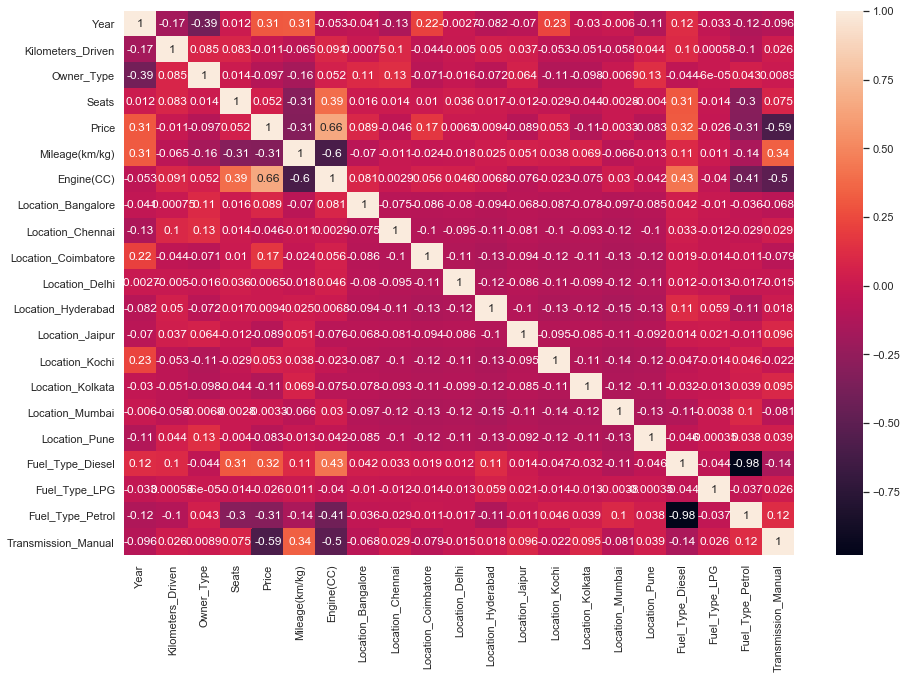

In [118]:
plt.figure(figsize=(15,10))
sns.heatmap(final_train.corr(),annot=True)
plt.show()

## Model Building

## Train/Test Split of Data

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
print("{0:0.2f}% in training set".format((len(x_train)/len(td.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(td.index)) * 100))

67.00% in training set
33.00% in test set


## Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression

X = X.apply(pd.to_numeric, errors='coerce')
y= y.apply(pd.to_numeric, errors='coerce')

In [90]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LinearRegression().fit(X_train, y_train)

In [98]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.6823515506564943
Accuracy on Testing set:  0.7131360814202816


Lets try another method

## Random Forest Regressor

In [148]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train.values.ravel())
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

Accuracy on Traing set:  0.9844231413068296
Accuracy on Testing set:  0.908143072555221


## Decision Tree

In [117]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_h=decision_tree.predict(X_test)

print('Train set acc:',decision_tree.score(X_train,y_train),'\nTest set acc:',decision_tree.score(X_test,y_test))
y_h

Train set acc: 0.9999985272929397 
Test set acc: 0.7258888927404055


array([15.  ,  4.5 ,  2.6 , ..., 21.42,  5.  ,  2.5 ])

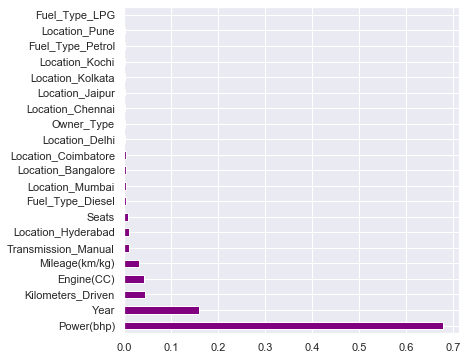

In [116]:
feat_importances = pd.Series(decision_tree.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(6,6),color='purple')
plt.show()

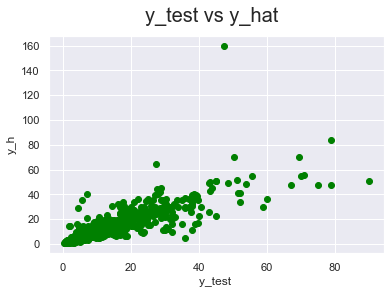

In [115]:
fig = plt.figure()
plt.scatter(y_test,y_h,color='green')
fig.suptitle('y_test vs y_hat', fontsize=20)   
plt.xlabel('y_test ')                       
plt.ylabel('y_h')  
plt.show()

 ## Error Table

In [99]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  3.5308192952828894
Mean Squared  Error      :  29.722095851553856
Root Mean Squared  Error :  5.451797488127549
R Squared Error          :  0.7131360814202816
